# Image processing notebook: from Transmission images to ROI-specific cross-section plots

### 00 - Introduction


### Applied processing
The following processing parts 

- Select directories of transmission images 
- display the image (average as default, but the sum is also available)
- adjust contrast, brightness, saturation, apply color LUTs to better analyze the image 
- apply zoom in a specific region (2 images side-by side, the right one has the zoom and the right one the region selected) [it displays the x,y,w,h info]
- Select several ROIs, you can manually type them too (add a string of values)
- give the names or mantain them as default (ROI_1, ROI_2, etc)
- print the image with the ROIs selected with the names
- select the graph you want to print 
- plot the cross-sections 
- have a file in excel with a pandas database with the transmission information (name of the sample 

## initial settings

### import libraries

In [1]:
import sys
sys.path.append(r'..\framework')
sys.path.append(r'..\proc_functions')
sys.path.append(r'..\utilities')
from stack_proc_func import *
from img_utils_4_transmission import *
from plot_cross_sections import *
%matplotlib inline

### provide directories

#### Provide the directory where the transmission images are saved

In [2]:
# %load select_directory('src_dir')
src_dir = r"D:\PSI21_08NI\Processed\01_Transmission_Results\exp201"

#### Provide the Spectra.txt file from any of the experiments. These are the neutron arrival times the MCP detected

In [3]:
# %load select_file('spectra_file')
spectra_file = r"D:\PSI21_08NI\meas_copyRAW\exp104\exp104_001_Spectra.txt"

#### Provide the directory where the casing transmission images are saved

In [4]:
# %load select_directory('casing_dir')
casing_dir = r"D:\PSI21_08NI\Processed\01_Transmission_Results\exp201"

In [5]:
flight_path = 5.45

### Select the folder where the casing transmission images are saved

In [6]:
casing_dict = prep_stack_dict(casing_dir)
for key in casing_dict.keys():
    print(key)

004_temp_00_p17_batch01
005_temp_00_p17_batch02
006_temp_00_p17_batch03
008_temp_01_p30_batch01
009_temp_01_p30_batch02
010_temp_01_p30_batch03
012_temp_02_p40_batch01
013_temp_02_p40_batch02
014_temp_02_p40_batch03
016_temp_00_p51_batch01
017_temp_00_p51_batch02
018_temp_00_p51_batch03
020_temp_01_p20_batch01
021_temp_01_p20_batch02
022_temp_01_p20_batch03
024_temp_02_p5_batch01
025_temp_02_p5_batch02
026_temp_02_p5_batch03
028_temp_03_m5_batch01
029_temp_03_m5_batch02
030_temp_03_m5_batch03
032_temp_04_m15_batch01
033_temp_04_m15_batch02
034_temp_04_m15_batch03


In [7]:
casing_images = avg_transmission_img(casing_dict, ['006_temp_00_p17_batch03'], save_results = False)

Averaging:   0%|                                         | 0/1 [00:00<?, ?it/s]

save_results = False


Averaging: 100%|█████████████████████████████████| 1/1 [00:02<00:00,  2.61s/it]


#### Select the ROI which corresponds to the casing

In [8]:
# %load select_multiple_rois('006_temp_00_p17_batch03', casing_images[0])
ROIs_006_temp_00_p17_batch03 = [[63, 289, 236, 64]]

#### Display the average of the casing transmission Images

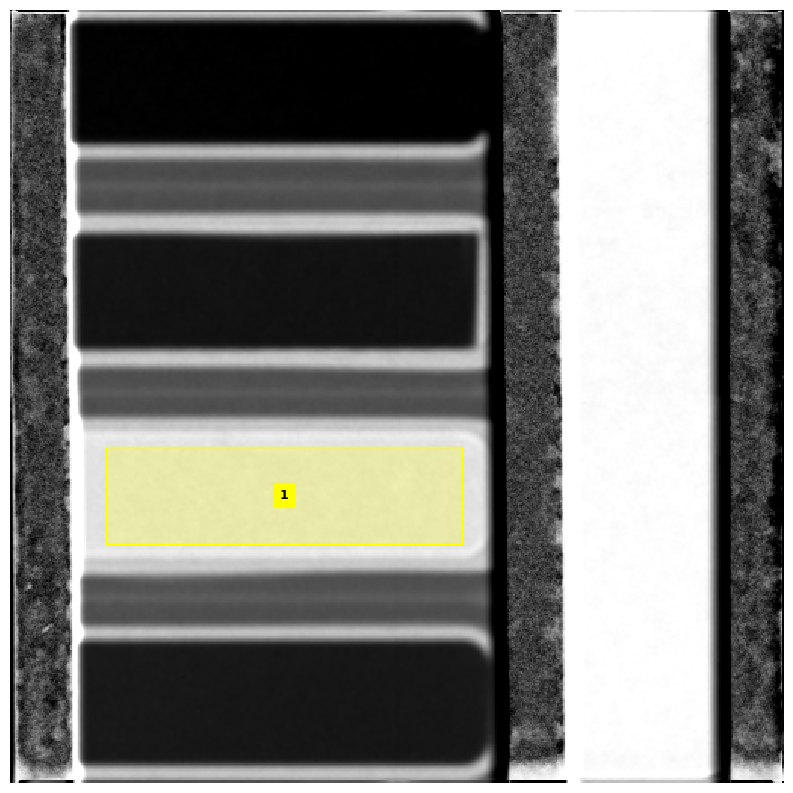

In [9]:
show_img(casing_images[0], dr = [(ROIs_006_temp_00_p17_batch03, 'yellow')], cmap='gray')

#### Create the dictionary with the folder contaiming the casing to process

In [10]:
rois_dict_casing = {}
for name in ['006_temp_00_p17_batch03']:
    rois_name = 'ROIs_'+ name
    for rois in [rois_name]:
        rois_dict_casing[rois] = eval(rois)

#### Get the casing transmission values to include them in the process

In [11]:
raw_trans_val_casing = get_transmission_values (casing_dict, rois_dict_casing, spectra_file, src_dir=src_dir,  binning = 1, 
                                         flight_path = flight_path, start_slice=1, end_slice = 100, save_results = True,
                                         name_xlsx = 'Transmission_values_casing.xlsx')

### Select folders with the samples to process

In [12]:
imgs_dict = prep_stack_dict(src_dir)
for key in imgs_dict.keys():
    print(key)

004_temp_00_p17_batch01
005_temp_00_p17_batch02
006_temp_00_p17_batch03
008_temp_01_p30_batch01
009_temp_01_p30_batch02
010_temp_01_p30_batch03
012_temp_02_p40_batch01
013_temp_02_p40_batch02
014_temp_02_p40_batch03
016_temp_00_p51_batch01
017_temp_00_p51_batch02
018_temp_00_p51_batch03
020_temp_01_p20_batch01
021_temp_01_p20_batch02
022_temp_01_p20_batch03
024_temp_02_p5_batch01
025_temp_02_p5_batch02
026_temp_02_p5_batch03
028_temp_03_m5_batch01
029_temp_03_m5_batch02
030_temp_03_m5_batch03
032_temp_04_m15_batch01
033_temp_04_m15_batch02
034_temp_04_m15_batch03


#### add the folders you are interested in 

In [13]:
#proc_folder = []
proc_folder = ['004_temp_00_p17_batch01', '005_temp_00_p17_batch02','006_temp_00_p17_batch03']

In [14]:
avg_images = avg_transmission_img(imgs_dict, proc_folder, save_results = False)

Averaging:   0%|                                         | 0/1 [00:00<?, ?it/s]

save_results = False


Averaging: 100%|█████████████████████████████████| 1/1 [00:00<00:00,  2.92it/s]


to use effectively the magic of %load, the selection of ROIs is required to be done separately per image. In this way we save the ROIs selected for the documentation 

no need to specify the processing folders again because the functions before, remove the "undesire" folders from the dictionary

In [15]:
# %load select_multiple_rois(proc_folder[0], avg_images [0], cmap = 'flag')
ROIs_004_temp_00_p17_batch01 = [[58, 432, 226, 60], [57, 296, 227, 57], [55, 161, 225, 56], [56, 24, 228, 55]]

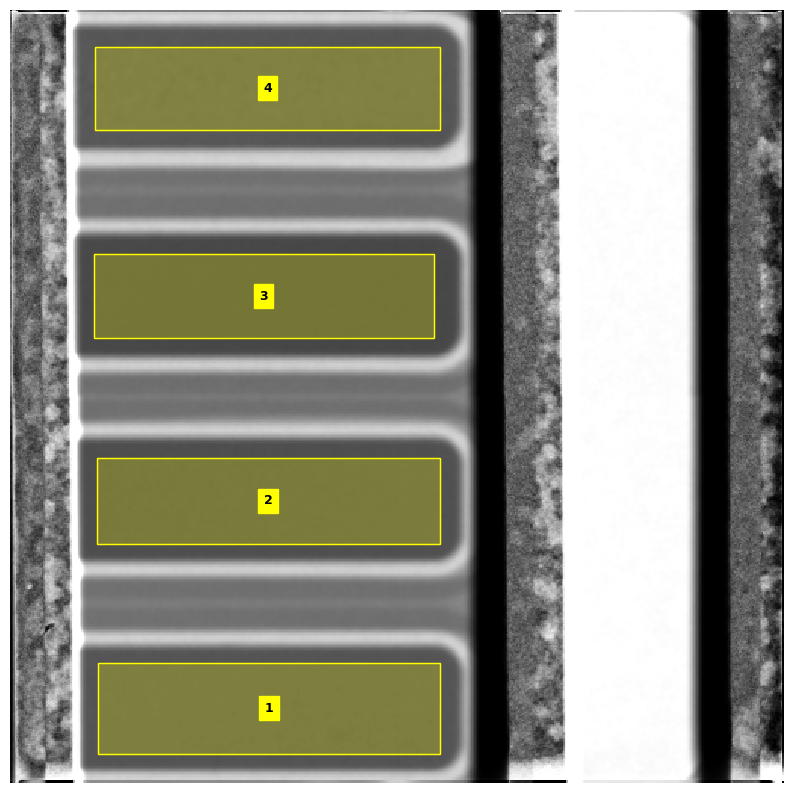

In [16]:
show_img(avg_images[0], dr = [(ROIs_004_temp_00_p17_batch01, 'yellow')], cmap='gray')

In [17]:
# %load select_multiple_rois(proc_folder[1], avg_images [1],cmap='flag')
ROIs_005_temp_00_p17_batch02 = [[58, 431, 233, 57], [60, 292, 232, 56], [56, 158, 232, 57], [53, 18, 234, 59]]

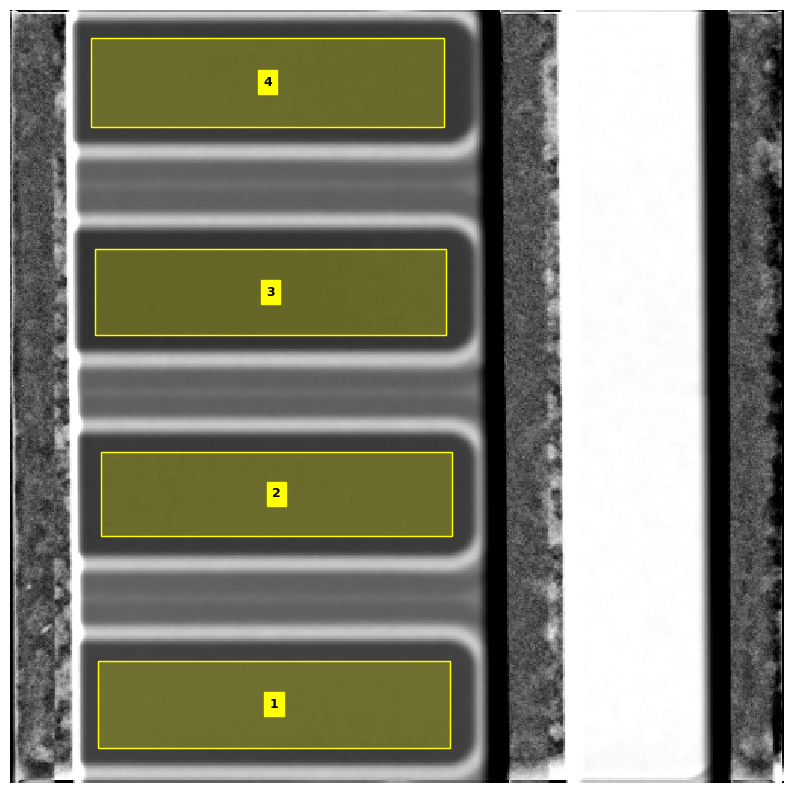

In [18]:
show_img(avg_images[1], dr = [(ROIs_005_temp_00_p17_batch02, 'yellow')], cmap='gray')

In [19]:
# %load select_multiple_rois(proc_folder[2], avg_images [2],cmap='flag')
ROIs_006_temp_00_p17_batch03 = [[58, 430, 242, 58], [54, 160, 241, 54], [55, 20, 245, 57]]

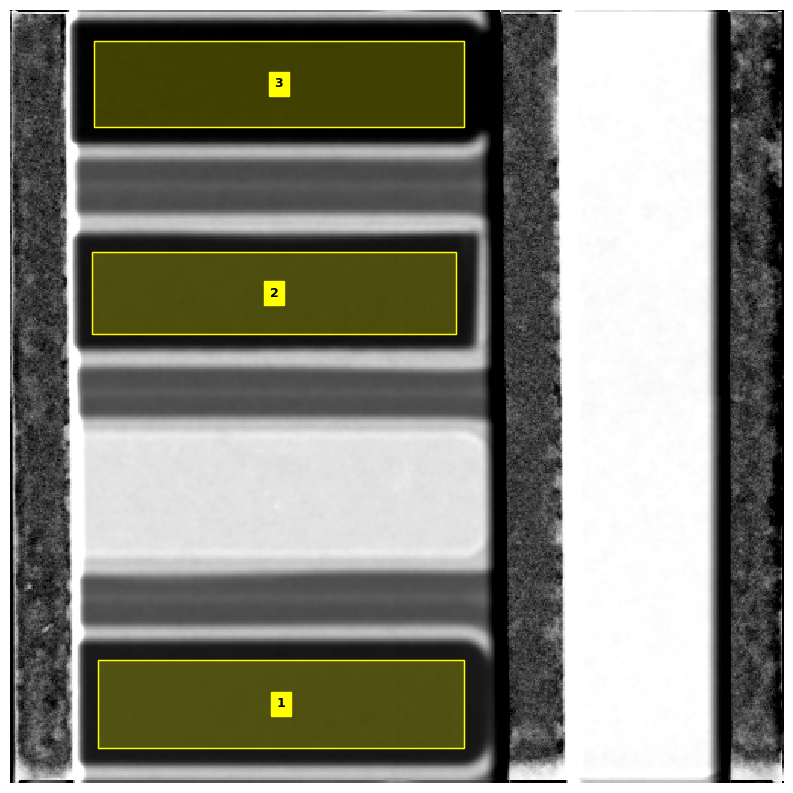

In [20]:
show_img(avg_images[2], dr = [(ROIs_006_temp_00_p17_batch03, 'yellow')], cmap='gray')

Because (for documentation reasons) the ROIs were selected separately. A dictionary is automatic created containing all the ROIs that were selected 

the automatic process is the following:

new_dict = {}
for folder,image in zip(proc_folder,avg_images):
    new_dict[folder] =select_multiple_rois(folder, image, just_rois=True)
    show_img(image, dr = [(new_dict.get(folder), 'yellow')], cmap='flag')
    
%load keep_roi_values_dict(new_dict)

However, it does not fit the documentation purpose and can only be used if you are sure the ROIs will never change

In [21]:
rois_dict = {}
for name in proc_folder:
    rois_name = 'ROIs_'+ name
    for rois in [rois_name]:
        rois_dict[rois] = eval(rois)
print(rois_dict)

{'ROIs_004_temp_00_p17_batch01': [[58, 432, 226, 60], [57, 296, 227, 57], [55, 161, 225, 56], [56, 24, 228, 55]], 'ROIs_005_temp_00_p17_batch02': [[58, 431, 233, 57], [60, 292, 232, 56], [56, 158, 232, 57], [53, 18, 234, 59]], 'ROIs_006_temp_00_p17_batch03': [[58, 430, 242, 58], [54, 160, 241, 54], [55, 20, 245, 57]]}


When you selected the folders you wanted to process, the program got rid of usless information. For this reason, the original dictionary "imgs_dict" will contain only the selcted folders and can be used directly in the next function

In [22]:
raw_trans_val = get_transmission_values (imgs_dict, rois_dict, spectra_file, src_dir=src_dir,  binning = 1, 
                                         flight_path = flight_path, start_slice=1, end_slice = 100, save_results = True,
                                         name_xlsx = 'Transmission_values.xlsx')

In [50]:
print(raw_trans_val)

    Wavelength [Å]  raw_trans_004_temp_00_p17_batch01_roi_1  \
0         0.130658                                 0.461334   
1         0.188728                                 0.460179   
2         0.246798                                 0.458687   
3         0.304869                                 0.457604   
4         0.362939                                 0.454726   
..             ...                                      ...   
94        6.409675                                 0.272619   
95        6.467745                                 0.275565   
96        6.525816                                 0.276436   
97        6.583886                                 0.280071   
98        6.641956                                 0.286435   

    raw_trans_004_temp_00_p17_batch01_roi_2  \
0                                  0.439096   
1                                  0.437106   
2                                  0.435429   
3                                  0.432627   
4       

In [51]:
h2o = {'abbv': 'H2O','composition' : {'H':2.0, 'O':1.0},'density':0.997, 'thickness': 0.3}
ec = {'abbv': 'EC', 'composition' : {'C':3.0, 'H':4.0, 'O':3.0},'density':1.32, 'thickness': 0.3}
dmc = {'abbv': 'DMC','composition' : {'C':3.0, 'H':6.0, 'O':3.0}, 'density':1.07, 'thickness': 0.3}
dec = {'abbv': 'DEC','composition' : {'C':5.0, 'H':10.0, 'O':3.0}, 'density':0.975, 'thickness': 0.3}
lipf6 = {'abbv': 'LiPF6','composition' : {'LI':1.0, 'P':1.0, 'F':6.0}, 'density':1.5, 'thickness': 0.3}
ec_dmc_11v = {'abbv': 'EC_DMC (1:1v)','molecules' : [ec,0.5,dmc,0.5], 'density':1.28, 'thickness': 0.3 }
ec_dmc_11w = {'abbv': 'EC_DMC (1:1w)','molecules' : [ec,0.447511501,dmc,0.552488499], 'density':1.2335, 'thickness': 0.3 }
ec_dec_11v = {'abbv': 'EC_DEC (1:1v)','molecules' : [ec,0.5,dec,0.5], 'density':1.1785, 'thickness': 0.3 }
ec_dec_37w = {'abbv': 'EC_DEC (3:7w)','molecules' : [ec,0.240305619,dec,0.759694381], 'density':1.0705, 'thickness': 0.3 }
lp30 = {'abbv': 'LP30','molecules' : [ec, 0.406359477,dmc, 0.501683056, lipf6, 0.091957467], 'density':1.2795, 'thickness': 0.3}
lp40 = {'abbv': 'LP40','molecules' : [ec, 0.447925137,dec, 0.447925137, lipf6, 0.104149725], 'density':1.2635, 'thickness': 0.3}
lp47 = {'abbv': 'LP47','molecules' : [ec, 0.218207723,dec, 0.689834809, lipf6 ,0.091957467], 'density':1.1685, 'thickness': 0.3}
ec_dec_sol = {'abbv': 'EC_DEC (sol)','molecules' : [ec,0.5,dec,0.5], 'density':1.1785, 'thickness': 0.3 }
pe = {'abbv': 'PE', 'composition' : {'C':1.0, 'H':2.0},'density':0.92, 'thickness': 0.2}

In [52]:
compounds_dict = [lp30,lp40,lp47,ec,ec_dmc_11v,ec_dec_11v, ec_dec_37w,dmc,dec,pe,h2o]

Function to get the cross sections, the requested_cs is a list of the desired cross-sections oprions are ['total_cs','h_cs','lli_cs']


In [59]:
requested_cs = ['h_cs']
cs_table = get_cross_sections (raw_trans_val, raw_trans_val_casing, compounds_dict, requested_cs , 
                               dst_dir = src_dir, save_table = True, name_xlsx = 'ICON_H_CS_results.xlsx')

In [60]:
print(cs_table)

    Wavelength [Å]  CS_H_in_LP30  CS_H_in_LP40  CS_H_in_LP47  CS_H_in_EC  \
0         0.130658     55.796829     56.877223     56.362594   57.215809   
1         0.188728     56.156785     57.392800     56.981008   57.892111   
2         0.246798     56.361164     57.636994     57.488723   58.225277   
3         0.304869     56.655700     58.268534     58.209017   59.032931   
4         0.362939     57.086184     58.632096     58.332876   59.295073   
..             ...           ...           ...           ...         ...   
94        6.409675     99.691545     95.563343     94.270513   86.239985   
95        6.467745     98.987472     94.198416     92.960246   85.675101   
96        6.525816     98.536912     93.142012     91.501242   84.120652   
97        6.583886     96.589830     90.710640     89.552217   81.654523   
98        6.641956     94.662279     89.518656     88.147212   81.619116   

    CS_H_in_EC_DMC (1:1v)  CS_H_in_EC_DEC (1:1v)  CS_H_in_EC_DEC (3:7w)  \
0           